In [1]:
cd ..

C:\Users\Sommer Lab\Documents\Analysis Code


In [233]:
import sys
# sys.path.append(r'C:\Users\Sommer Lab\Documents\Analysis Code')
import os
from scipy.optimize import curve_fit
from scipy.ndimage import rotate
from scipy.integrate import simpson

from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy.interpolate import interp2d

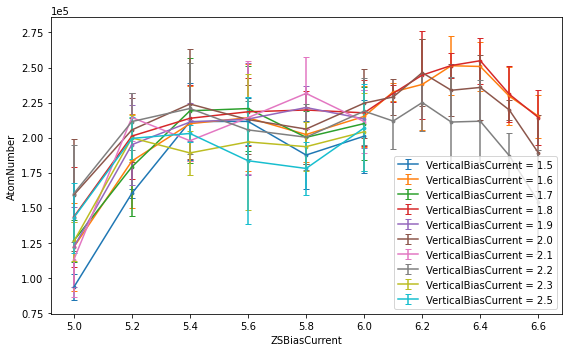

In [12]:
totalDataPath =r"Z:\ats317group\Data"
date = '10/12/2023'
dataCSV_filename = 'ODT Position 5.csv'

dayFolderPath = ImageAnalysisCode.GetDataLocation(date, DataPath=totalDataPath)
dataCSV_filePath = os.path.join(dayFolderPath, dataCSV_filename)

ImageAnalysisCode.PlotFromDataCSV(dataCSV_filePath, 
                                  'ZSBiasCurrent', 'AtomNumber', 
                                  iterateVariable='VerticalBiasCurrent', groupbyX=1)

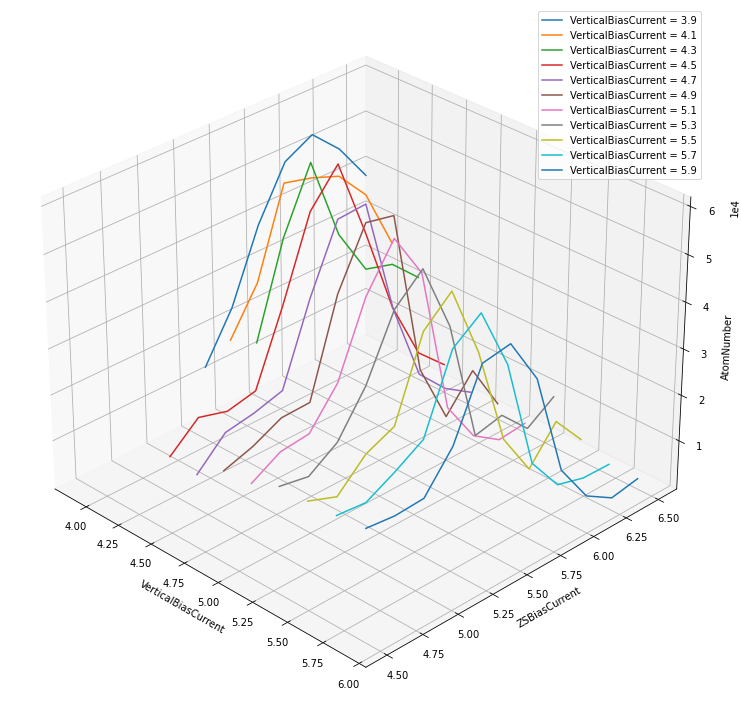

In [119]:
totalDataPath =r"Z:\ats317group\Data"
date = '10/13/2023'
dataCSV_filename = 'ODT Position 9.csv'

dayFolderPath = ImageAnalysisCode.GetDataLocation(date, DataPath=totalDataPath)
dataCSV_filePath = os.path.join(dayFolderPath, dataCSV_filename)

PlotFromDataCSV(dataCSV_filePath, 
                                  'ZSBiasCurrent', 'AtomNumber', 
                                  iterateVariable='VerticalBiasCurrent', groupbyX=1, threeD=1)

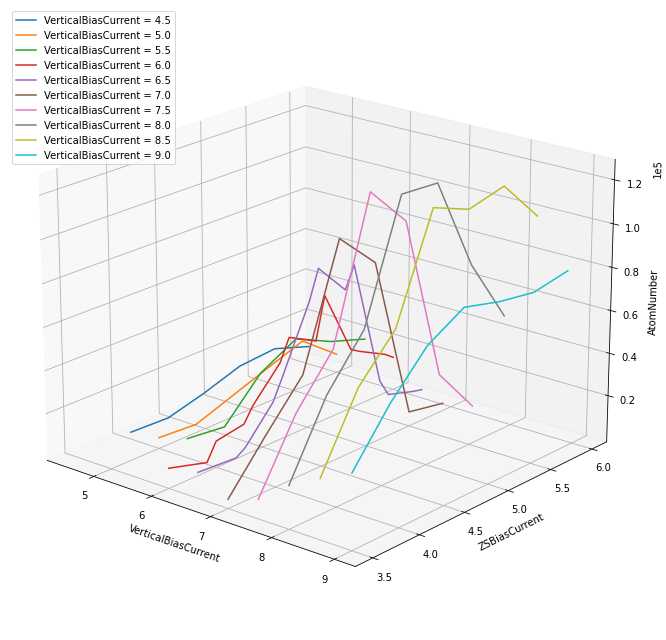

In [162]:
totalDataPath =r"Z:\ats317group\Data"
date = '10/13/2023'
dataCSV_filename = 'ODT Position 11.csv'

dayFolderPath = ImageAnalysisCode.GetDataLocation(date, DataPath=totalDataPath)
dataCSV_filePath = os.path.join(dayFolderPath, dataCSV_filename)

PlotFromDataCSV(dataCSV_filePath, 
                                  'ZSBiasCurrent', 'AtomNumber', 
                                  iterateVariable='VerticalBiasCurrent', groupbyX=1, 
                threeD=1, viewElev=20, viewAzim=-50)

In [159]:
def PlotFromDataCSV(df, xVariable, yVariable, 
                    groupby=None, groupbyX=0, iterateVariable=None,
                    filterByAnd=[], filterByOr=[], filterByOr2=[],
                    legend=1, legendLoc=0,
                    threeD=0, viewElev=30, viewAzim=-45):
    '''
    

    Parameters
    ----------
    df : DataFrame
        Pandas dataframe from CalculateFromZyla or loaded from a saved data file.
    xVariable : str
        The name of the variable to be plotted as the x axis. It should be the 
        name of a column of the dataframe.
    yVariable : str
        The name of the variable to be plotted as the y axis. It should be the 
        name of a column of the dataframe.
    groupby : str, default: None
        The name of a dataframe column. If it is assigned, the data points will be
        averaged based on the values of this column, and the plot will be an
        errorbar plot.
    groupbyX : boolean, default: 0
        The name of a dataframe column. If it is true, the data points will be
        averaged based for each x value, and the plot will be an errorbar plot.
    iterateVariable : str, default: None
        The name of a dataframe column. If it is assigned, the plot will be divided
        into different groups based on the values of this column.        
    filterByAnd : list of strings, default: []
        A list of the filter conditions. Each condition should be in the form of 
        'ColumName+operator+value'. No spaces around the operator. Different condtions
        will be conbined by logic and. 
    filterByOr : list of strings, default: []
        A list of the filter conditions. Each condition should be in the form of 
        'ColumName+operator+value'. No spaces around the operator. Different condtions
        will be conbined by logic or. 
    filterByOr2 : list of strings, default: []
        The same as filterByOr, but a logical and will be performed for the 
        results of filterByOr2 and filterByOr.    
    threeD : boolean, default: 0
        Plot a 3-D line plot if set to True. 
    viewElev : float, default: 30
        The elevation angle of the 3-D plot. 
    viewAzim : float, default: -45
        The azimuthal angle of the 3-D plot. 

    Raises
    ------
    FileNotFoundError
        DESCRIPTION.

    Returns
    -------
    fig, ax.

    '''
    
        
    # if not os.path.exists(filePath):
    #     raise FileNotFoundError("The file does not exist!")
    
    # df = pd.read_csv(filePath)
    df = df[ ~np.isnan(df[yVariable]) ]
    df = DataFilter(df, filterByAnd, filterByOr, filterByOr2)
        
    columnlist = [xVariable.replace(' ', '_'), yVariable.replace(' ', '_')]
    
    if iterateVariable:
        iterateVariable.replace(' ', '_')
        iterable = df[iterateVariable].unique()
        iterable.sort()
        columnlist.append(iterateVariable)
    else:
        iterable = [None]
        threeD = 0
    
    if groupby == xVariable or groupbyX:
        groupbyX = 1  
        groupby = xVariable
    if groupby and not groupbyX:
        groupby.replace(' ', '_')
        columnlist.append(groupby)
    
    if threeD:
        fig, ax = plt.subplots(figsize=(9,9), subplot_kw=dict(projection='3d'))
        ax.view_init(elev=viewElev, azim=viewAzim)
    else:
        fig, ax = plt.subplots(figsize=(8,5))
    
    for ii in iterable:
        if ii is None:
            dfii = df[columnlist]
        else:
            dfii = df[columnlist][ (df[iterateVariable]==ii) ]
            
        if groupby:
            dfiimean = dfii.groupby(groupby).mean()
            dfiistd = dfii.groupby(groupby).std()
            
            yMean = dfiimean[yVariable]
            yStd = dfiistd[yVariable]
            
            if groupbyX:
                xMean = dfiimean.index
                xStd = None
            else:
                xMean = dfiimean[xVariable]
                xStd = dfiistd[xVariable]
            
            if threeD:
                ax.plot3D( [ii]*len(xMean), xMean, yMean,
                         label = '{} = {}'.format(iterateVariable, ii))                
            else:
                ax.errorbar(xMean, yMean, yStd, xStd, capsize=3,
                            label = '{} = {}'.format(iterateVariable, ii)) 
                #plt.scatter(xMean, yMean, s=8)
        else:
            ax.plot( dfii[xVariable], dfii[yVariable], '.', 
                     label = '{} = {}'.format(iterateVariable, ii))
            
    if threeD:
        ax.set(xlabel=iterateVariable, ylabel=xVariable, zlabel=yVariable)
        ax.ticklabel_format(axis='z', style='sci', scilimits=(-3,3))
    else:
        ax.set(xlabel=xVariable, ylabel=yVariable)
        ax.ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
    fig.tight_layout()
    if iterateVariable and legend:
        plt.legend(loc=legendLoc)
    plt.show()
    
    return fig, ax

In [231]:
df[['AtomNumber', 'ZSBiasCurrent', 'VerticalBiasCurrent']].groupby(['ZSBiasCurrent', 'VerticalBiasCurrent']).mean()['AtomNumber'].unstack()

VerticalBiasCurrent,4.4,4.5,4.6,4.7,4.8,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.4,8.7,9.0
ZSBiasCurrent,,,,,,,,,,,,,,,
4.4,NaN,NaN,NaN,NaN,NaN,3.813654e+07,NaN,NaN,3.801463e+07,NaN,NaN,3.857373e+07,3.842132e+07,3.863633e+07,3.866910e+07
4.6,NaN,NaN,NaN,NaN,NaN,4.449637e+07,4.516138e+07,4.531169e+07,4.520352e+07,4.498003e+07,4.497800e+07,4.463706e+07,4.429363e+07,4.407328e+07,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,4.835056e+07,4.827874e+07,4.812931e+07,4.758779e+07,4.817330e+07,NaN,NaN,NaN,NaN
4.8,NaN,NaN,NaN,NaN,NaN,5.147730e+07,5.125121e+07,5.174858e+07,5.048771e+07,5.003571e+07,4.957978e+07,4.915980e+07,4.841486e+07,4.707377e+07,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,5.323394e+07,5.278932e+07,5.305474e+07,5.270297e+07,5.262191e+07,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,5.596055e+07,5.654585e+07,5.622941e+07,5.475278e+07,5.535005e+07,5.426835e+07,5.287986e+07,5.117108e+07,4.967421e+07,4.766207e+07
5.2,NaN,NaN,NaN,NaN,NaN,5.936893e+07,NaN,NaN,5.714106e+07,NaN,NaN,5.438060e+07,5.215394e+07,4.947633e+07,4.775932e+07
5.4,NaN,NaN,NaN,NaN,NaN,6.014010e+07,NaN,NaN,5.627497e+07,NaN,NaN,5.385314e+07,5.098836e+07,4.822107e+07,4.655467e+07
5.5,9.398039e+07,9.285453e+07,8.998201e+07,9.039093e+07,8.808088e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df[['AtomNumber', 'ZSBiasCurrent', 'VerticalBiasCurrent']].groupby(['ZSBiasCurrent', 'VerticalBiasCurrent']).mean()
df2 = df1.AtomNumber.unstack()
df3 = FillDataGap(df2)

df3 = FillDataGap(df2).interpolate('polynomial', order=3).interpolate('polynomial', order=3, axis=1)

xx = df3.columns.values
yy = df3.index.values
zz = df3.values

fig, ax = plt.subplots(figsize=[10,10], subplot_kw=dict(projection='3d'))
XX,YY = np.meshgrid(xx,yy)
ax.plot_surface(XX, YY ,zz, cmap=cm.coolwarm)

In [453]:
def FillAxisGap(x):
    xInterp = np.arange(x.min(), x.max(), np.diff(x).min()).round(5)
    return [ii for ii in xInterp if ii not in x]

def FillDataGap(df, fillValue=np.nan):
    x, y = df.columns.values, df.index.values    
    xInsert, yInsert = FillAxisGap(x), FillAxisGap(y)
    
    df1 = pd.DataFrame( np.full([len(yInsert), len(x)], fillValue), index=yInsert, columns=x )
    df = pd.concat([df,df1])
    
    y = df.index.values
    df1 = pd.DataFrame( np.full([len(y), len(xInsert)], fillValue), index=y, columns=xInsert )
    
    return df.join(df1).sort_index().sort_index(axis=1)

def FitFunc(X, a, b, c):
    x, y = X
    return 

def FindOverlap(df1, df2):
    return resultsNo.loc[(df1.index < df2.index.max()) & (df1.index > df2.index.min()), 
                         (df1.columns < df2.columns.max()) & (df1.columns > df2.columns.min())]

def FindIntersection(df1, df2):
    return df1.loc[ df1.index.intersection(df2.index), df1.columns.intersection(df2.columns) ]

In [441]:
def PlotSurfFromDataCSV(df, X, Y, Z,
                      filterByAnd=[], filterByOr=[], filterByOr2=[],
                      fillvalue=np.nan, interp=1, method='polynomial', order=3,
                      threeD=0, viewElev=30, viewAzim=-45,): 
  
    df = df[ ~np.isnan(df[Y]) ]
           
    df = DataFilter(df, filterByAnd, filterByOr, filterByOr2)   
    
    df = df[[X, Y, Z]].groupby([Y, X]).mean()[Z].unstack(fill_value=fillvalue)    
    df = FillDataGap(df, fillvalue).rename_axis(index=Y, columns=X)
    
    if interp:        
        df = df.interpolate(method, order=order).interpolate(method, order=order, axis=1)        
    
    xx, yy, zz = df.columns.values, df.index.values, df.values
    XX,YY = np.meshgrid(xx,yy)
    
    fig, ax = plt.subplots(figsize=[10,10], subplot_kw=dict(projection='3d'))
    ax.view_init(elev=viewElev, azim=viewAzim)
    ax.plot_surface(XX, YY ,zz, cmap=cm.coolwarm)       
    ax.set(xlabel=X, ylabel=Y, zlabel=Z)
    ax.ticklabel_format(axis='z', style='sci', scilimits=(-3,3))
    fig.tight_layout()
    plt.show()
        
    return df, fig, ax
    
    
    
def DataFilter(df, filterByAnd=[], filterByOr=[], filterByOr2=[]):
    if filterByAnd:
        for flt in filterByAnd:
            df = df[ eval('df.' + flt.replace(' ', '_')) ]
            
    if filterByOr:
        df = FilterByOr(df, [filterByOr, filterByOr2])
    return df
    
def FilterByOr(df, filterLists):
    
    masks = []
    for flts in filterLists:
        masklist = []
        for flt in flts:
            masklist.append(eval( 'df.' + flt.replace(' ', '_') ))   
           
        if len(masklist) > 1:
            for mask in masklist[1:]:
                masklist[0] |= mask
        masks.append(masklist[0])
        
    if len(masks) > 1:
        for mask in masks[1:]:
            mask[0] &= mask
    return df[ mask[0] ]

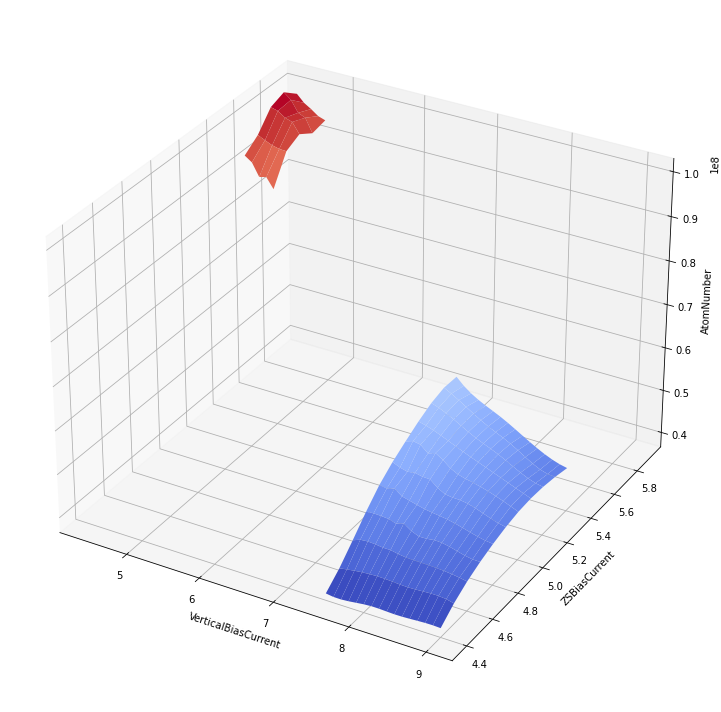

In [400]:
filePath = r'Z:\ats317group\Data\2023\10-2023\17 Oct 2023\No ODT Bias Scan.csv'
df = pd.read_csv(filePath)
resultsNo,_,_ = PlotSurfFromDataCSV(df, 'VerticalBiasCurrent', 'ZSBiasCurrent', 'AtomNumber',
                                 fillvalue=np.nan)

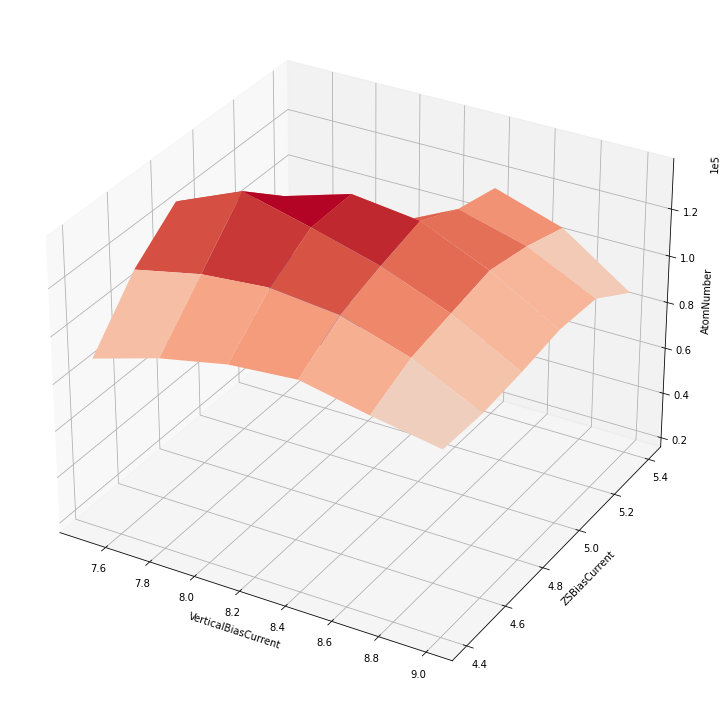

In [406]:
filePath = r'Z:\ats317group\Data\2023\10-2023\17 Oct 2023\ODT Position 11.csv'
df = pd.read_csv(filePath)
results11,_,_ = PlotSurfFromDataCSV(df, 'VerticalBiasCurrent', 'ZSBiasCurrent', 'AtomNumber',
                                 interp=0)

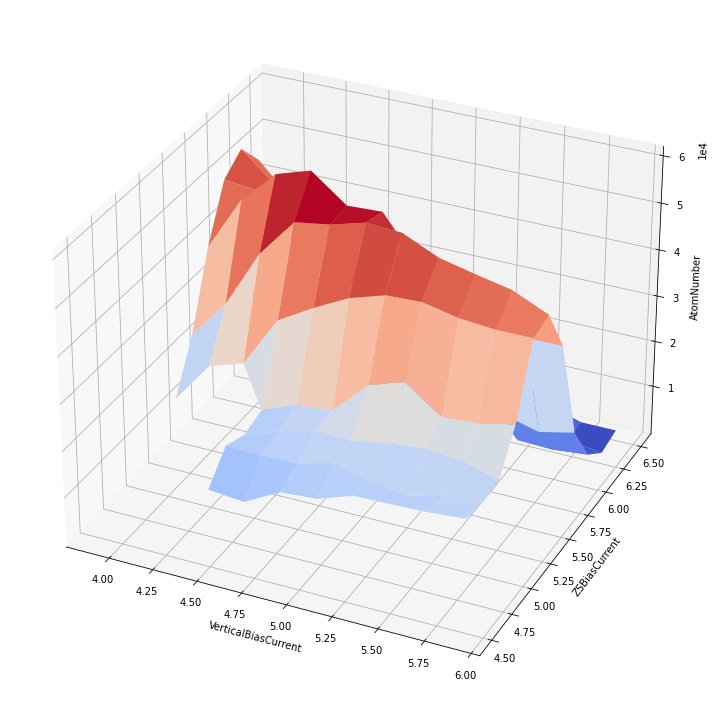

In [444]:
filePath = r'Z:\ats317group\Data\2023\10-2023\13 Oct 2023\ODT Position 9.csv'
df = pd.read_csv(filePath)
results9,_,_ = PlotSurfFromDataCSV(df, 'VerticalBiasCurrent', 'ZSBiasCurrent', 'AtomNumber',
                                 interp=0, viewAzim=-65)

In [415]:
resultsNo

VerticalBiasCurrent,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0
ZSBiasCurrent,,,,,,,,,,,,,,,,,,,,,
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.857373e+07,3.856650e+07,3.848551e+07,3.842132e+07,3.844233e+07,3.852818e+07,3.863633e+07,3.872423e+07,3.874933e+07,3.866910e+07
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.188669e+07,4.178715e+07,4.167072e+07,4.161387e+07,4.166760e+07,4.178103e+07,4.187780e+07,4.188156e+07,4.171595e+07,4.130461e+07
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.463706e+07,4.438581e+07,4.430520e+07,4.429363e+07,4.426490e+07,4.419448e+07,4.407328e+07,4.389219e+07,4.364211e+07,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.700227e+07,4.626315e+07,4.630744e+07,4.653562e+07,4.647155e+07,4.613263e+07,4.565965e+07,4.519338e+07,4.487461e+07,4.484412e+07
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.915980e+07,4.888642e+07,4.867293e+07,4.841486e+07,4.803535e+07,4.756794e+07,4.707377e+07,4.661400e+07,4.624976e+07,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.120187e+07,5.026436e+07,5.002934e+07,4.997960e+07,4.970167e+07,4.919686e+07,4.857019e+07,4.792668e+07,4.737136e+07,4.700924e+07
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.287986e+07,5.201655e+07,5.152634e+07,5.117108e+07,5.075489e+07,5.025083e+07,4.967421e+07,4.904033e+07,4.836452e+07,4.766207e+07
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.393147e+07,5.323535e+07,5.256868e+07,5.191149e+07,5.124773e+07,5.057722e+07,4.990372e+07,4.923099e+07,4.856279e+07,4.790290e+07
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.438060e+07,5.362238e+07,5.291062e+07,5.215394e+07,5.128969e+07,5.037015e+07,4.947633e+07,4.868925e+07,4.808991e+07,4.775932e+07


In [445]:
(resultsNo.index < results9.index.max()) & (resultsNo.index > results9.index.min())

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [423]:
resultsNo.index < results9.index.max()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [430]:
resultsNo.index > results9.index.min()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [447]:
resultsNo.loc[(resultsNo.index < results9.index.max()) & (resultsNo.index > results9.index.min()), 
             (resultsNo.columns < results9.columns.max()) & (resultsNo.columns > results9.columns.min())]

VerticalBiasCurrent,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8
ZSBiasCurrent,,,,,,,,,,,,,,,
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [451]:
FindOverlap(resultsNo, results11)

VerticalBiasCurrent,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9
ZSBiasCurrent,,,,,,,,,,,,,,
4.5,4.125367e+07,4.150766e+07,4.170785e+07,4.184435e+07,4.190726e+07,4.188669e+07,4.178715e+07,4.167072e+07,4.161387e+07,4.166760e+07,4.178103e+07,4.187780e+07,4.188156e+07,4.171595e+07
4.6,4.516138e+07,4.531169e+07,4.520352e+07,4.498003e+07,4.497800e+07,4.463706e+07,4.438581e+07,4.430520e+07,4.429363e+07,4.426490e+07,4.419448e+07,4.407328e+07,4.389219e+07,4.364211e+07
4.7,4.835056e+07,4.827874e+07,4.812931e+07,4.758779e+07,4.817330e+07,4.700227e+07,4.626315e+07,4.630744e+07,4.653562e+07,4.647155e+07,4.613263e+07,4.565965e+07,4.519338e+07,4.487461e+07
4.8,5.125121e+07,5.174858e+07,5.048771e+07,5.003571e+07,4.957978e+07,4.915980e+07,4.888642e+07,4.867293e+07,4.841486e+07,4.803535e+07,4.756794e+07,4.707377e+07,4.661400e+07,4.624976e+07
4.9,5.323394e+07,5.278932e+07,5.305474e+07,5.270297e+07,5.262191e+07,5.120187e+07,5.026436e+07,5.002934e+07,4.997960e+07,4.970167e+07,4.919686e+07,4.857019e+07,4.792668e+07,4.737136e+07
5.0,5.654585e+07,5.622941e+07,5.475278e+07,5.535005e+07,5.426835e+07,5.287986e+07,5.201655e+07,5.152634e+07,5.117108e+07,5.075489e+07,5.025083e+07,4.967421e+07,4.904033e+07,4.836452e+07
5.1,5.738565e+07,5.681234e+07,5.614420e+07,5.541729e+07,5.466769e+07,5.393147e+07,5.323535e+07,5.256868e+07,5.191149e+07,5.124773e+07,5.057722e+07,4.990372e+07,4.923099e+07,4.856279e+07
5.2,5.879493e+07,5.803042e+07,5.714106e+07,5.619252e+07,5.525048e+07,5.438060e+07,5.362238e+07,5.291062e+07,5.215394e+07,5.128969e+07,5.037015e+07,4.947633e+07,4.868925e+07,4.808991e+07
5.3,5.936415e+07,5.837264e+07,5.732433e+07,5.626764e+07,5.525096e+07,5.432268e+07,5.350554e+07,5.271960e+07,5.185928e+07,5.085634e+07,4.979194e+07,4.878460e+07,4.795286e+07,4.741524e+07


In [452]:
resultsNo.loc[ resultsNo.index.intersection(results9.index), resultsNo.columns.intersection(results9.columns) ]

VerticalBiasCurrent,4.5,4.7,4.9,5.1,5.3,5.5,5.7,5.9
ZSBiasCurrent,,,,,,,,
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.5,9.285453e+07,9.039093e+07,NaN,NaN,NaN,NaN,NaN,NaN
5.7,1.000004e+08,9.833773e+07,NaN,NaN,NaN,NaN,NaN,NaN
5.9,9.741326e+07,9.521339e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [416]:
resultsNo[ resultsNo.index ]

VerticalBiasCurrent,4.4,4.5,4.6,4.7
ZSBiasCurrent,,,,
4.4,NaN,NaN,NaN,NaN
4.5,NaN,NaN,NaN,NaN
4.6,NaN,NaN,NaN,NaN
4.7,NaN,NaN,NaN,NaN
4.8,NaN,NaN,NaN,NaN
4.9,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN
5.1,NaN,NaN,NaN,NaN
5.2,NaN,NaN,NaN,NaN


In [448]:
results9

VerticalBiasCurrent,3.9,4.1,4.3,4.5,4.7,4.9,5.1,5.3,5.5,5.7,5.9
ZSBiasCurrent,,,,,,,,,,,
4.5,NaN,NaN,NaN,16047.636294,15357.823605,19401.023967,19909.101328,22525.462675,22682.114985,22955.226201,23568.645209
4.7,NaN,NaN,NaN,21356.615197,21242.916489,21389.889982,23433.419218,21375.155614,20343.461488,22356.249211,22898.979988
4.9,NaN,NaN,NaN,19604.350901,22318.082556,24398.420334,24118.800752,25427.915451,26123.115832,25547.400680,23266.777763
5.1,NaN,NaN,NaN,20966.500034,24090.834423,24606.020650,31756.458593,34256.246771,28829.038088,29209.139311,30920.563006
5.3,14031.799782,22995.952589,25391.212365,36400.228346,40752.205373,44571.450016,46890.520370,47189.615264,45596.839156,44974.648204,44995.924313
5.5,24303.646812,32680.185502,45079.936768,53461.176444,54613.375858,56646.264611,56170.135472,52729.051095,50999.318238,49413.231149,46016.666152
5.7,39570.026369,51348.533879,58393.012430,60710.336063,55038.243796,55374.783338,46137.147379,37776.931149,35307.968183,35704.924579,35723.662950
5.9,50577.951398,49778.658141,40295.509569,43260.302395,29944.777075,19504.110908,14218.013244,11168.992822,13459.565855,11413.325510,13114.790837
6.1,53786.626869,47461.470802,29939.735146,24310.058374,12475.179472,6019.837890,4862.457689,12523.748151,3743.056464,3475.036799,4235.991834


In [417]:
results11

VerticalBiasCurrent,7.5,7.8,8.1,8.4,8.7,9.0
ZSBiasCurrent,,,,,,
4.4,88759.417099,97357.914969,103293.036237,105616.237246,99688.946390,94724.730842
4.6,111879.383808,118002.853900,120497.671703,117517.516309,108306.806007,94148.860716
4.8,126820.215037,138764.629005,131504.824849,123515.173640,112081.169426,96191.686817
5.0,113256.868540,123449.343405,132010.258980,128517.471897,115798.472945,99194.906818
5.2,69752.859478,91579.389617,106300.486950,120051.285318,112156.354073,98014.096248
5.4,18366.492187,36039.703493,80502.258332,115664.723492,106322.372585,86404.299981


In [341]:
results.rename_axis(index='asdf', columns='qwer')

qwer,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0
asdf,,,,,,,,,,,,,,,,,,,,,
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.857373e+07,3.856650e+07,3.848551e+07,3.842132e+07,3.844233e+07,3.852818e+07,3.863633e+07,3.872423e+07,3.874933e+07,3.866910e+07
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.188669e+07,4.178715e+07,4.167072e+07,4.161387e+07,4.166760e+07,4.178103e+07,4.187780e+07,4.188156e+07,4.171595e+07,4.130461e+07
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.463706e+07,4.438581e+07,4.430520e+07,4.429363e+07,4.426490e+07,4.419448e+07,4.407328e+07,4.389219e+07,4.364211e+07,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.700227e+07,4.626315e+07,4.630744e+07,4.653562e+07,4.647155e+07,4.613263e+07,4.565965e+07,4.519338e+07,4.487461e+07,4.484412e+07
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.915980e+07,4.888642e+07,4.867293e+07,4.841486e+07,4.803535e+07,4.756794e+07,4.707377e+07,4.661400e+07,4.624976e+07,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.120187e+07,5.026436e+07,5.002934e+07,4.997960e+07,4.970167e+07,4.919686e+07,4.857019e+07,4.792668e+07,4.737136e+07,4.700924e+07
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.287986e+07,5.201655e+07,5.152634e+07,5.117108e+07,5.075489e+07,5.025083e+07,4.967421e+07,4.904033e+07,4.836452e+07,4.766207e+07
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.393147e+07,5.323535e+07,5.256868e+07,5.191149e+07,5.124773e+07,5.057722e+07,4.990372e+07,4.923099e+07,4.856279e+07,4.790290e+07
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.438060e+07,5.362238e+07,5.291062e+07,5.215394e+07,5.128969e+07,5.037015e+07,4.947633e+07,4.868925e+07,4.808991e+07,4.775932e+07


In [379]:
df = pd.read_csv(r'Z:\ats317group\Data\2023\10-2023\17 Oct 2023\No ODT Bias Scan.csv')

In [380]:
df

,time,Folder,Ycenter,Ywidth,AtomNumber,Xcenter,Xwidth,AtomNumberX,IterationNum,IterationCount,...,ZSBiasCurrent,CamBiasCurrent,VerticalBiasCurrent,ZSBiasVoltage,CamBiasVoltage,VerticalBiasVoltage,HighServo1,LowServo1,D1Time_ms,ODT_Position
0,2023-10-17 16:42:51.890,Andor/No_ODT_Bias_Scan,0.006954,0.001179,3.890048e+07,0.006778,0.001519,3.940156e+07,0.0,108.0,...,4.4,0.0,7.5,1.152,0.322,1.7345,2.2,0.0,1.5,99.0
1,2023-10-17 16:42:58.330,Andor/No_ODT_Bias_Scan,0.006990,0.001217,3.904712e+07,0.006756,0.001576,3.994533e+07,1.0,108.0,...,4.4,0.0,7.8,1.152,0.322,1.7888,2.2,0.0,1.5,99.0
2,2023-10-17 16:43:04.590,Andor/No_ODT_Bias_Scan,0.007040,0.001197,3.944922e+07,0.006774,0.001595,4.058456e+07,2.0,108.0,...,4.4,0.0,8.1,1.152,0.322,1.8431,2.2,0.0,1.5,99.0
3,2023-10-17 16:43:10.820,Andor/No_ODT_Bias_Scan,0.007107,0.001221,3.906805e+07,0.006798,0.001624,4.037096e+07,3.0,108.0,...,4.4,0.0,8.4,1.152,0.322,1.8974,2.2,0.0,1.5,99.0
4,2023-10-17 16:43:17.070,Andor/No_ODT_Bias_Scan,0.007153,0.001228,3.948204e+07,0.006820,0.001628,4.005449e+07,4.0,108.0,...,4.4,0.0,8.7,1.152,0.322,1.9517,2.2,0.0,1.5,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2023-10-17 17:58:21.140,Andor/No_ODT_Bias_Scan_2,0.006538,0.001215,9.317599e+07,0.006300,0.001766,9.753674e+07,70.0,75.0,...,5.9,0.0,4.4,1.422,0.322,1.1734,2.2,0.0,1.5,99.0
254,2023-10-17 17:58:27.490,Andor/No_ODT_Bias_Scan_2,0.006517,0.001202,9.139358e+07,0.006245,0.001783,9.599858e+07,71.0,75.0,...,5.9,0.0,4.5,1.422,0.322,1.1915,2.2,0.0,1.5,99.0
255,2023-10-17 17:58:33.880,Andor/No_ODT_Bias_Scan_2,0.006547,0.001221,9.220589e+07,0.006240,0.001825,9.731102e+07,72.0,75.0,...,5.9,0.0,4.6,1.422,0.322,1.2096,2.2,0.0,1.5,99.0
256,2023-10-17 17:58:40.300,Andor/No_ODT_Bias_Scan_2,0.006521,0.001206,9.340719e+07,0.006177,0.001894,1.004203e+08,73.0,75.0,...,5.9,0.0,4.7,1.422,0.322,1.2277,2.2,0.0,1.5,99.0


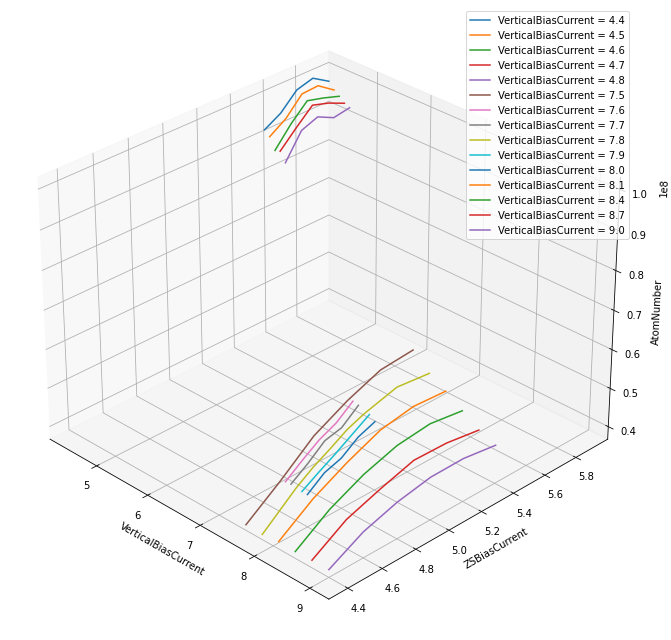

(<Figure size 648x648 with 1 Axes>,
 <Axes3DSubplot:xlabel='VerticalBiasCurrent', ylabel='ZSBiasCurrent'>)

In [381]:
ImageAnalysisCode.PlotFromDataCSV(r'Z:\ats317group\Data\2023\10-2023\17 Oct 2023\No ODT Bias Scan.csv', 'ZSBiasCurrent', 'AtomNumber', 
#                                    filterByAnd=['wait==30', 'AtomNumber>1e4'], 
                iterateVariable='VerticalBiasCurrent', groupbyX=1, threeD=1, )

In [384]:
df1 = df[['AtomNumber', 'ZSBiasCurrent', 'VerticalBiasCurrent']].groupby(['VerticalBiasCurrent', 'ZSBiasCurrent']).mean()
df1

AtomNumber
VerticalBiasCurrent ZSBiasCurrent              
4.4                 5.5            9.398039e+07
                    5.6            9.636934e+07
                    5.7            1.004306e+08
                    5.8            1.015988e+08
                    5.9            9.905444e+07
...                                         ...
9.0                 4.6            4.331394e+07
                    4.8            4.604221e+07
                    5.0            4.766207e+07
                    5.2            4.775932e+07
                    5.4            4.655467e+07

[83 rows x 1 columns]

In [385]:
df1.index.levels

FrozenList([[4.4, 4.5, 4.6, 4.7, 4.8, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.4, 8.7, 9.0], [4.4, 4.6, 4.7, 4.8, 4.9, 5.0, 5.2, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9]])

In [388]:
df1.index.get_level_values(0)

Float64Index([4.4, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
              4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 7.5,
              7.5, 7.5, 7.5, 7.5, 7.5, 7.6, 7.6, 7.6, 7.6, 7.6, 7.7, 7.7, 7.7,
              7.7, 7.7, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.9, 7.9, 7.9,
              7.9, 7.9, 8.0, 8.0, 8.0, 8.0, 8.0, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1,
              8.4, 8.4, 8.4, 8.4, 8.4, 8.4, 8.7, 8.7, 8.7, 8.7, 8.7, 8.7, 9.0,
              9.0, 9.0, 9.0, 9.0, 9.0],
             dtype='float64', name='VerticalBiasCurrent')

In [ ]:
df

In [205]:
df2 = df1.AtomNumber.unstack()
df2

VerticalBiasCurrent,4.4,4.5,4.6,4.7,4.8,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.4,8.7,9.0
ZSBiasCurrent,,,,,,,,,,,,,,,
4.4,NaN,NaN,NaN,NaN,NaN,3.813654e+07,NaN,NaN,3.801463e+07,NaN,NaN,3.857373e+07,3.842132e+07,3.863633e+07,3.866910e+07
4.6,NaN,NaN,NaN,NaN,NaN,4.449637e+07,4.516138e+07,4.531169e+07,4.520352e+07,4.498003e+07,4.497800e+07,4.463706e+07,4.429363e+07,4.407328e+07,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,4.835056e+07,4.827874e+07,4.812931e+07,4.758779e+07,4.817330e+07,NaN,NaN,NaN,NaN
4.8,NaN,NaN,NaN,NaN,NaN,5.147730e+07,5.125121e+07,5.174858e+07,5.048771e+07,5.003571e+07,4.957978e+07,4.915980e+07,4.841486e+07,4.707377e+07,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,5.323394e+07,5.278932e+07,5.305474e+07,5.270297e+07,5.262191e+07,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,5.596055e+07,5.654585e+07,5.622941e+07,5.475278e+07,5.535005e+07,5.426835e+07,5.287986e+07,5.117108e+07,4.967421e+07,4.766207e+07
5.2,NaN,NaN,NaN,NaN,NaN,5.936893e+07,NaN,NaN,5.714106e+07,NaN,NaN,5.438060e+07,5.215394e+07,4.947633e+07,4.775932e+07
5.4,NaN,NaN,NaN,NaN,NaN,6.014010e+07,NaN,NaN,5.627497e+07,NaN,NaN,5.385314e+07,5.098836e+07,4.822107e+07,4.655467e+07
5.5,9.398039e+07,9.285453e+07,8.998201e+07,9.039093e+07,8.808088e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
df3 = FillDataGap(df2)
df3

,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.857373e+07,NaN,NaN,3.842132e+07,NaN,NaN,3.863633e+07,NaN,NaN,3.866910e+07
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.463706e+07,NaN,NaN,4.429363e+07,NaN,NaN,4.407328e+07,NaN,NaN,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.915980e+07,NaN,NaN,4.841486e+07,NaN,NaN,4.707377e+07,NaN,NaN,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.287986e+07,NaN,NaN,5.117108e+07,NaN,NaN,4.967421e+07,NaN,NaN,4.766207e+07
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.438060e+07,NaN,NaN,5.215394e+07,NaN,NaN,4.947633e+07,NaN,NaN,4.775932e+07
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
df3modified = df3.copy()
df3modified

,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.857373e+07,NaN,NaN,3.842132e+07,NaN,NaN,3.863633e+07,NaN,NaN,3.866910e+07
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.463706e+07,NaN,NaN,4.429363e+07,NaN,NaN,4.407328e+07,NaN,NaN,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.915980e+07,NaN,NaN,4.841486e+07,NaN,NaN,4.707377e+07,NaN,NaN,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.287986e+07,NaN,NaN,5.117108e+07,NaN,NaN,4.967421e+07,NaN,NaN,4.766207e+07
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.438060e+07,NaN,NaN,5.215394e+07,NaN,NaN,4.947633e+07,NaN,NaN,4.775932e+07
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
df3modified.iloc[-6, :4] = df3modified.iloc[-5, :4]
df3modified

,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.857373e+07,NaN,NaN,3.842132e+07,NaN,NaN,3.863633e+07,NaN,NaN,3.866910e+07
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.463706e+07,NaN,NaN,4.429363e+07,NaN,NaN,4.407328e+07,NaN,NaN,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.915980e+07,NaN,NaN,4.841486e+07,NaN,NaN,4.707377e+07,NaN,NaN,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.287986e+07,NaN,NaN,5.117108e+07,NaN,NaN,4.967421e+07,NaN,NaN,4.766207e+07
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.438060e+07,NaN,NaN,5.215394e+07,NaN,NaN,4.947633e+07,NaN,NaN,4.775932e+07
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
df3modifiedInterp = df3modified.interpolate('polynomial', order=3, axis=1).interpolate('linear', order=3, axis=0)
df3modifiedInterp

,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.857373e+07,3.856650e+07,3.848551e+07,3.842132e+07,3.844233e+07,3.852818e+07,3.863633e+07,3.872423e+07,3.874933e+07,3.866910e+07
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.160539e+07,4.147616e+07,4.139536e+07,4.135748e+07,4.135361e+07,4.136133e+07,4.135481e+07,4.130821e+07,4.119572e+07,4.099152e+07
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.463706e+07,4.438581e+07,4.430520e+07,4.429363e+07,4.426490e+07,4.419448e+07,4.407328e+07,4.389219e+07,4.364211e+07,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.689843e+07,4.663611e+07,4.648907e+07,4.635425e+07,4.615012e+07,4.588121e+07,4.557353e+07,4.525309e+07,4.494594e+07,4.467808e+07
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.915980e+07,4.888642e+07,4.867293e+07,4.841486e+07,4.803535e+07,4.756794e+07,4.707377e+07,4.661400e+07,4.624976e+07,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.101983e+07,5.045148e+07,5.009963e+07,4.979297e+07,4.939512e+07,4.890938e+07,4.837399e+07,4.782716e+07,4.730714e+07,4.685214e+07
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.287986e+07,5.201655e+07,5.152634e+07,5.117108e+07,5.075489e+07,5.025083e+07,4.967421e+07,4.904033e+07,4.836452e+07,4.766207e+07
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.363023e+07,5.281946e+07,5.221848e+07,5.166251e+07,5.102229e+07,5.031049e+07,4.957527e+07,4.886479e+07,4.822721e+07,4.771069e+07
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.438060e+07,5.362238e+07,5.291062e+07,5.215394e+07,5.128969e+07,5.037015e+07,4.947633e+07,4.868925e+07,4.808991e+07,4.775932e+07
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.411687e+07,5.329498e+07,5.245259e+07,5.157115e+07,5.064477e+07,4.971816e+07,4.884870e+07,4.809377e+07,4.751074e+07,4.715699e+07


In [289]:
xx = df3modified.columns.values
yy = df3modified.index.values
zz = df3modified.values
zz2 = df3modifiedInterp.values

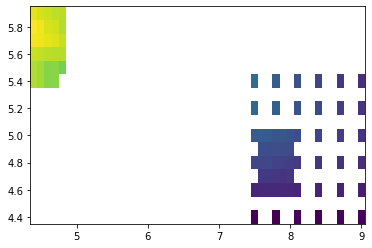

In [290]:
plt.pcolormesh(xx, yy, zz)

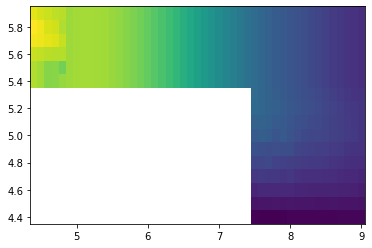

In [321]:
plt.pcolormesh(xx, yy, zz2)

In [221]:
df3 = FillDataGap(df2).interpolate('polynomial', order=3).interpolate('polynomial', order=3, axis=1)
df3

,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,...,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0
4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.857373e+07,3.856650e+07,3.848551e+07,3.842132e+07,3.844233e+07,3.852818e+07,3.863633e+07,3.872423e+07,3.874933e+07,3.866910e+07
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.188669e+07,4.178715e+07,4.167072e+07,4.161387e+07,4.166760e+07,4.178103e+07,4.187780e+07,4.188156e+07,4.171595e+07,4.130461e+07
4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.463706e+07,4.438581e+07,4.430520e+07,4.429363e+07,4.426490e+07,4.419448e+07,4.407328e+07,4.389219e+07,4.364211e+07,4.331394e+07
4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.700227e+07,4.626315e+07,4.630744e+07,4.653562e+07,4.647155e+07,4.613263e+07,4.565965e+07,4.519338e+07,4.487461e+07,4.484412e+07
4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.915980e+07,4.888642e+07,4.867293e+07,4.841486e+07,4.803535e+07,4.756794e+07,4.707377e+07,4.661400e+07,4.624976e+07,4.604221e+07
4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.120187e+07,5.026436e+07,5.002934e+07,4.997960e+07,4.970167e+07,4.919686e+07,4.857019e+07,4.792668e+07,4.737136e+07,4.700924e+07
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.287986e+07,5.201655e+07,5.152634e+07,5.117108e+07,5.075489e+07,5.025083e+07,4.967421e+07,4.904033e+07,4.836452e+07,4.766207e+07
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.393147e+07,5.323535e+07,5.256868e+07,5.191149e+07,5.124773e+07,5.057722e+07,4.990372e+07,4.923099e+07,4.856279e+07,4.790290e+07
5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.438060e+07,5.362238e+07,5.291062e+07,5.215394e+07,5.128969e+07,5.037015e+07,4.947633e+07,4.868925e+07,4.808991e+07,4.775932e+07
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.432268e+07,5.350554e+07,5.271960e+07,5.185928e+07,5.085634e+07,4.979194e+07,4.878460e+07,4.795286e+07,4.741524e+07,4.729026e+07


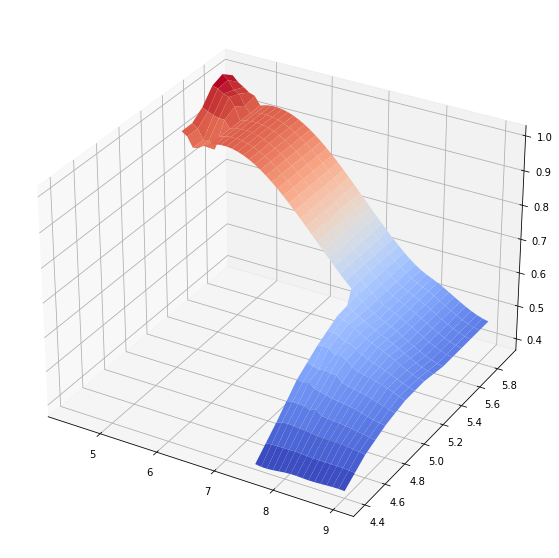

In [322]:
fig, ax = plt.subplots(figsize=[10,10], subplot_kw=dict(projection='3d'))
XX,YY = np.meshgrid(xx,yy)
ax.plot_surface(XX, YY ,zz2, cmap=cm.coolwarm)

In [222]:
xx = df3.columns.values
yy = df3.index.values
zz = df3.values

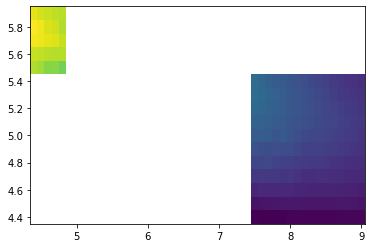

In [223]:
plt.pcolormesh(xx, yy, zz)

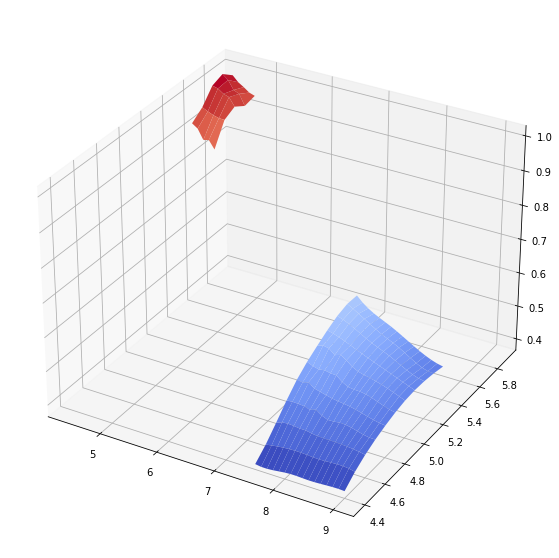

In [226]:
fig, ax = plt.subplots(figsize=[10,10], subplot_kw=dict(projection='3d'))
XX,YY = np.meshgrid(xx,yy)
ax.plot_surface(XX, YY ,zz, cmap=cm.coolwarm)

In [27]:
df2.index

Float64Index([4.4, 4.5, 4.6, 4.7, 4.8, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.4,
              8.7, 9.0],
             dtype='float64', name='VerticalBiasCurrent')

In [29]:
df2.columns

Float64Index([4.4, 4.6, 4.7, 4.8, 4.9, 5.0, 5.2, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9], dtype='float64', name='ZSBiasCurrent')

In [30]:
df2.values

array([[           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
        9.39803876e+07, 9.63693379e+07, 1.00430604e+08, 1.01598765e+08,
        9.90544424e+07],
       [           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
        9.28545253e+07, 9.56002325e+07, 1.00000440e+08, 1.00283403e+08,
        9.74132574e+07],
       [           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
        8.99820100e+07, 9.48891718e+07, 9.88677885e+07, 9.77646707e+07,
        9.63984898e+07],
       [           nan,            nan,            nan,            nan,
                   nan,            nan,            nan,            nan,
        9.03909295e+07, 9.44869289e+07, 9.83377299e+07, 9.70590398e+07,
        9.52133889e+07],
       [           nan,            n

In [71]:
df2.index

MultiIndex([( 6.5, 0.0),
            ( 6.5, 0.5),
            ( 6.5, 1.0),
            ( 6.5, 1.5),
            (6.55, 0.0),
            (6.55, 0.5),
            (6.55, 1.0),
            (6.55, 1.5),
            ( 6.6, 0.0),
            ( 6.6, 0.5),
            ( 6.6, 1.0),
            ( 6.6, 1.5),
            (6.65, 0.0),
            (6.65, 0.5),
            (6.65, 1.0),
            (6.65, 1.5),
            ( 6.7, 0.0),
            ( 6.7, 0.5),
            ( 6.7, 1.0),
            ( 6.7, 1.5),
            (6.75, 0.0),
            (6.75, 0.5),
            (6.75, 1.0),
            (6.75, 1.5),
            ( 6.8, 0.0),
            ( 6.8, 0.5),
            ( 6.8, 1.0),
            ( 6.8, 1.5),
            (6.85, 0.0),
            (6.85, 0.5),
            (6.85, 1.0),
            (6.85, 1.5),
            ( 6.9, 0.0),
            ( 6.9, 0.5),
            ( 6.9, 1.0),
            ( 6.9, 1.5),
            (6.95, 0.0),
            (6.95, 0.5),
            (6.95, 1.0),
            (6.95, 1.5),


In [160]:
ind0 = np.array(df2.index.get_level_values(0))
ind1 = np.array(df2.index.get_level_values(1))
zz = np.array(df2.AtomNumber)

In [133]:
zz.reshape(15,4)

array([[168818.50079715, 186145.44075206, 187449.48236779,
        147296.28293198],
       [170229.26728671, 203751.73993676, 180565.01015998,
        138451.91779632],
       [182283.04908812, 199089.15601951, 168922.35388332,
        123090.9130635 ],
       [191755.64530956, 203833.886978  , 176432.40777048,
        107211.27545526],
       [189110.66860597, 206128.81130688, 142851.74828792,
         97427.47021536],
       [192463.08530702, 203185.73498442, 171717.03024756,
        119572.25627476],
       [202435.94058352, 181714.44807616, 128268.16195757,
         64479.73353741],
       [187655.08640409, 191001.94380107, 124109.82573942,
         76367.51408982],
       [185848.64319015, 169174.35593202,  88579.38387261,
         47387.75689562],
       [177032.77339726, 159490.08154713, 110000.97989012,
         70841.82516965],
       [192199.89659683, 176659.46017409,  82168.50159237,
         28206.85848766],
       [168332.33793929, 125371.89112804,  49720.97567501,
      

In [ ]:
df1 = df[['AtomNumber', 'ZSBiasCurrent', 'VerticalBiasCurrent']].groupby(['ZSBiasCurrent', 'VerticalBiasCurrent']).mean()
df2 = df1.AtomNumber.unstack()
df3 = FillDataGap(df2)

df3 = FillDataGap(df2).interpolate('polynomial', order=3).interpolate('polynomial', order=3, axis=1)

In [134]:
len(ind0)

60

In [356]:
totalDataPath =r"Z:\ats317group\Data"
date = '10/12/2023'
dataCSV_filename = 'ODT Position 1.csv'

dayFolderPath = ImageAnalysisCode.GetDataLocation(date, DataPath=totalDataPath)
dataCSV_filePath = os.path.join(dayFolderPath, dataCSV_filename)

In [357]:
dfPosition5 = pd.read_csv(dataCSV_filePath)
dfPosition5 = dfPosition5[
    ['AtomNumber', 'ZSBiasCurrent', 'VerticalBiasCurrent']
].groupby(['ZSBiasCurrent', 'VerticalBiasCurrent'
          ]).mean().AtomNumber.unstack(level='VerticalBiasCurrent')

In [358]:
dfPosition5

VerticalBiasCurrent,0.0,0.5,1.0,1.5
ZSBiasCurrent,,,,
6.50,168818.500797,186145.440752,187449.482368,147296.282932
6.55,170229.267287,203751.739937,180565.010160,138451.917796
6.60,182283.049088,199089.156020,168922.353883,123090.913064
6.65,191755.645310,203833.886978,176432.407770,107211.275455
6.70,189110.668606,206128.811307,142851.748288,97427.470215
6.75,192463.085307,203185.734984,171717.030248,119572.256275
6.80,202435.940584,181714.448076,128268.161958,64479.733537
6.85,187655.086404,191001.943801,124109.825739,76367.514090
6.90,185848.643190,169174.355932,88579.383873,47387.756896


In [364]:
X = dfPosition5.columns.values
Y = dfPosition5.index.values
Z = dfPosition5.values

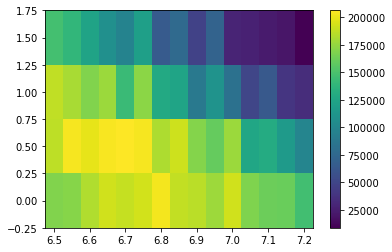

In [368]:
plt.pcolormesh( Y,X, Z.T)
plt.colorbar()

In [ ]:
dfPosition5.groupby('')

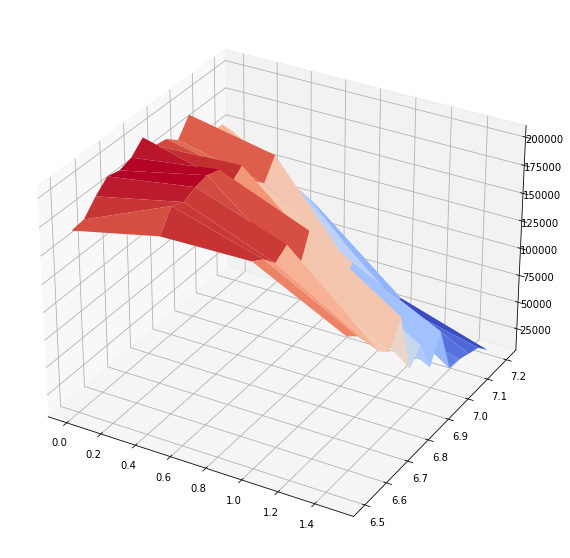

In [371]:
dfPosition5,_,_ = PlotSurfFromDataCSV(pd.read_csv(dataCSV_filePath), 
                    'VerticalBiasCurrent', 'ZSBiasCurrent', 'AtomNumber',
                   interp=1)

In [352]:
dfPosition5

VerticalBiasCurrent,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
ZSBiasCurrent,,,,,,,,,,,
5.0,93254.463008,121839.821525,126427.428941,143453.460238,121894.567109,159106.475516,112820.582860,160046.526293,125960.272077,NaN,142854.847892
5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.2,160217.150949,183254.363211,179070.769891,201084.226414,194968.551932,205482.139092,214344.642548,211444.353410,199778.504473,NaN,199421.545780
5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.4,211440.284575,209916.452562,219100.525272,213769.581667,211056.655198,223965.291782,197753.807688,220750.161248,189058.081470,NaN,202939.085173
5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.6,211566.811021,214176.390566,220692.551702,218403.390844,213234.724773,212821.671579,214245.338331,205482.766915,196902.214574,NaN,183487.259951
5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.8,187547.283056,202170.428696,200171.717562,219674.386016,221428.927828,206075.646531,231526.185616,200273.235248,193520.945435,NaN,177968.640914


In [ ]:
df1 = df[['AtomNumber', 'ZSBiasCurrent', 'VerticalBiasCurrent']].groupby(['ZSBiasCurrent', 'VerticalBiasCurrent']).mean()
df2 = df1.AtomNumber.unstack()
df3 = FillDataGap(df2)

df3 = FillDataGap(df2).interpolate('polynomial', order=3).interpolate('polynomial', order=3, axis=1)

xx = df3.columns.values
yy = df3.index.values
zz = df3.values

fig, ax = plt.subplots(figsize=[10,10], subplot_kw=dict(projection='3d'))
XX,YY = np.meshgrid(xx,yy)
ax.plot_surface(XX, YY ,zz, cmap=cm.coolwarm)

In [89]:
df2.index.names

FrozenList(['ZSBiasCurrent', 'VerticalBiasCurrent'])

In [95]:
np.array(df2.index.get_level_values(0))

array([6.5 , 6.5 , 6.5 , 6.5 , 6.55, 6.55, 6.55, 6.55, 6.6 , 6.6 , 6.6 ,
       6.6 , 6.65, 6.65, 6.65, 6.65, 6.7 , 6.7 , 6.7 , 6.7 , 6.75, 6.75,
       6.75, 6.75, 6.8 , 6.8 , 6.8 , 6.8 , 6.85, 6.85, 6.85, 6.85, 6.9 ,
       6.9 , 6.9 , 6.9 , 6.95, 6.95, 6.95, 6.95, 7.  , 7.  , 7.  , 7.  ,
       7.05, 7.05, 7.05, 7.05, 7.1 , 7.1 , 7.1 , 7.1 , 7.15, 7.15, 7.15,
       7.15, 7.2 , 7.2 , 7.2 , 7.2 ])

In [98]:
np.array(df2.AtomNumber)

array([168818.50079715, 186145.44075206, 187449.48236779, 147296.28293198,
       170229.26728671, 203751.73993676, 180565.01015998, 138451.91779632,
       182283.04908812, 199089.15601951, 168922.35388332, 123090.9130635 ,
       191755.64530956, 203833.886978  , 176432.40777048, 107211.27545526,
       189110.66860597, 206128.81130688, 142851.74828792,  97427.47021536,
       192463.08530702, 203185.73498442, 171717.03024756, 119572.25627476,
       202435.94058352, 181714.44807616, 128268.16195757,  64479.73353741,
       187655.08640409, 191001.94380107, 124109.82573942,  76367.51408982,
       185848.64319015, 169174.35593202,  88579.38387261,  47387.75689562,
       177032.77339726, 159490.08154713, 110000.97989012,  70841.82516965,
       192199.89659683, 176659.46017409,  82168.50159237,  28206.85848766,
       168332.33793929, 125371.89112804,  49720.97567501,  27193.85771392,
       161538.57885147, 129746.48925638,  63067.29990094,  23349.39926597,
       161003.35733874, 1

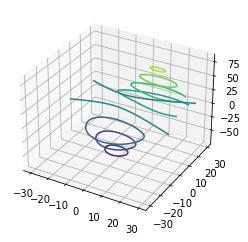

In [25]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

In [34]:
Z

array([[-0.00982064, -0.0113957 , -0.01319036, ..., -0.01522953,
        -0.01319036, -0.0113957 ],
       [-0.0113957 , -0.01322338, -0.01530587, ..., -0.01767209,
        -0.01530587, -0.01322338],
       [-0.01319036, -0.01530587, -0.01771632, ..., -0.02045518,
        -0.01771632, -0.01530587],
       ...,
       [-0.01200234, -0.01414685, -0.01660867, ...,  0.02918791,
         0.03019517,  0.03085725],
       [-0.01097235, -0.01288301, -0.01507265, ...,  0.01583738,
         0.01709512,  0.01804782],
       [-0.00988645, -0.01157475, -0.01350698, ...,  0.00702321,
         0.0083816 ,  0.00947216]])

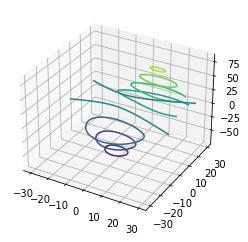

In [56]:
from mpl_toolkits.mplot3d import axes3d

plt.figure()
plt.subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = plt.contour(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

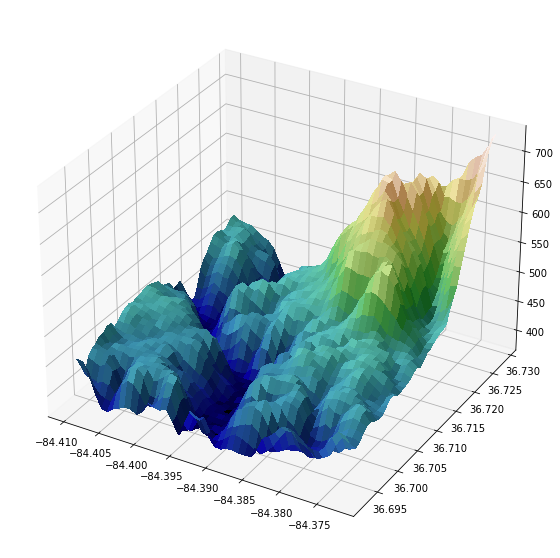

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

filename = cbook.get_sample_data('jacksboro_fault_dem.npz', asfileobj=False)
with np.load(filename) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(figsize=[10,10], subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, 
                       facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

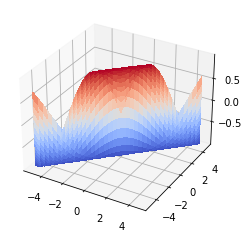

In [201]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
XX, YY = np.meshgrid(X, Y)
R = np.sqrt(XX**2 + YY**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


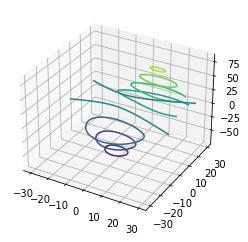

In [25]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

In [8]:
2 a

SyntaxError: invalid syntax (Temp/ipykernel_12716/2743500614.py, line 1)

In [6]:
a=2